In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error
from statsmodels.nonparametric.kde import KDEUnivariate
from sklearn.metrics import classification_report,roc_curve,auc
from patsy import dmatrices
import statsmodels.api as sm

In [26]:
df = pd.read_csv('titanic_data.csv')

In [27]:
from warnings import simplefilter
simplefilter(action='ignore',category=FutureWarning)

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
df.count(axis=0)

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [33]:
df = df.drop(['Name','Ticket','Cabin'],axis=1,)

In [34]:
df.count(axis=0)

PassengerId    891
Survived       891
Pclass         891
Sex            891
Age            714
SibSp          891
Parch          891
Fare           891
Embarked       889
dtype: int64

In [42]:
df = df.dropna()
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [43]:
df.count(axis=0)

PassengerId    712
Survived       712
Pclass         712
Sex            712
Age            712
SibSp          712
Parch          712
Fare           712
Embarked       712
dtype: int64

In [57]:
formula = 'Survived ~ C(Pclass) + C(Sex) +Age + SibSp + C(Embarked) +Parch'

In [58]:
df_train = df.iloc[0:600,:]
df_test = df.iloc[600:,:]

In [59]:
y_train,x_train =dmatrices(formula_like=formula,data=df_train,return_type='dataframe')

In [60]:
y_test,x_test =dmatrices(formula_like=formula,data=df_test,return_type='dataframe')

In [65]:
model = sm.Logit(endog=y_train,exog=x_train)
res=model.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.450031
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  600
Model:                          Logit   Df Residuals:                      591
Method:                           MLE   Df Model:                            8
Date:                Sat, 11 Feb 2023   Pseudo R-squ.:                  0.3333
Time:                        10:50:36   Log-Likelihood:                -270.02
converged:                       True   LL-Null:                       -404.99
Covariance Type:            nonrobust   LLR p-value:                 1.009e-53
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.3332      0.510      8.490      0.000       3.333       5.334
C(Pclass)[T.2]      -1.2030      0.325     -3.703      0.000      -1.840      -0.566
C(Pclass)[T.3]      -2.4673      0.320     -7.705      0.000      -3.095      -1.840
C(Sex)[T.male]      -2.6312      0.244    -10.797      0.000      -3.109      -2.154
C(Embarked)[T.Q]    -0.4359      0.647     -0.674      0.501      -1.704       0.832
C(Embarked)[T.S]    -0.2910      0.297     -0.980      0.327      -0.873       0.291
Age                 -0.0397      0.009     -4.464      0.000      -0.057      -0.022
SibSp               -0.3202      0.136     -2.354      0.019      -0.587      -0.054
Parch               -0.1420      0.136     -1.041      0.298      -0.409       0.125
====================================================================================
"""

In [66]:
formula = 'Survived ~ C(Pclass) + C(Sex) +Age + SibSp'

y_train,x_train =dmatrices(formula_like=formula,data=df_train,return_type='dataframe')
y_test,x_test =dmatrices(formula_like=formula,data=df_test,return_type='dataframe')

In [67]:
model = sm.Logit(endog=y_train,exog=x_train)
res=model.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.451793
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  600
Model:                          Logit   Df Residuals:                      594
Method:                           MLE   Df Model:                            5
Date:                Sat, 11 Feb 2023   Pseudo R-squ.:                  0.3307
Time:                        10:55:17   Log-Likelihood:                -271.08
converged:                       True   LL-Null:                       -404.99
Covariance Type:            nonrobust   LLR p-value:                 8.172e-56
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.1050      0.479      8.575      0.000       3.167       5.043
C(Pclass)[T.2]    -1.2971      0.306     -4.242      0.000      -1.896      -0.698
C(Pclass)[T.3]    -2.5739      0.305     -8.433      0.000      -3.172      -1.976
C(Sex)[T.male]    -2.5808      0.235    -10.996      0.000      -3.041      -2.121
Age               -0.0401      0.009     -4.549      0.000      -0.057      -0.023
SibSp             -0.3691      0.130     -2.840      0.005      -0.624      -0.114
==================================================================================
"""

Text(0.5, 1.0, 'Distribution of our Predictions')

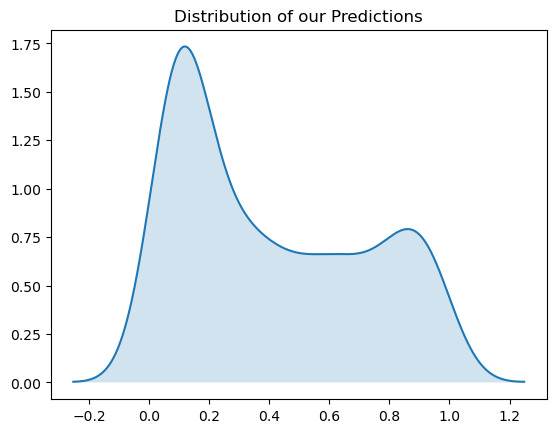

In [69]:
kde_res = KDEUnivariate(endog=res.predict())
kde_res.fit()
plt.plot(kde_res.support,kde_res.density)
plt.fill_between(kde_res.support,kde_res.density,alpha=0.2)
plt.title("Distribution of our Predictions")

In [72]:
x_train.columns



Index(['Intercept', 'C(Pclass)[T.2]', 'C(Pclass)[T.3]', 'C(Sex)[T.male]',
       'Age', 'SibSp'],
      dtype='object')

C:\Users\Saikat\AppData\Local\Temp\ipykernel_8620\3583180487.py:2: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', axis='x')


Text(0.5, 1.0, 'The Survival Chances of Male')

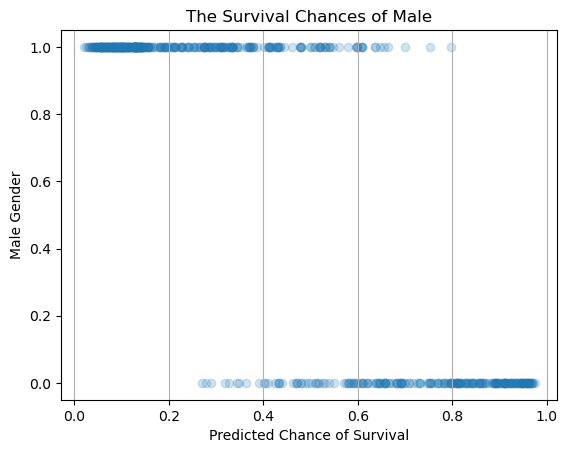

In [75]:
plt.scatter(x=res.predict(), y=x_train['C(Sex)[T.male]'], alpha=0.2)
plt.grid(b=True, which='major', axis='x')
plt.xlabel("Predicted Chance of Survival")
plt.ylabel("Male Gender")
plt.title("The Survival Chances of Male")

C:\Users\Saikat\AppData\Local\Temp\ipykernel_8620\4237021662.py:2: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', axis='x')


Text(0.5, 1.0, 'The Change of Survival Probability by Lower Class Which is 3rd Class')

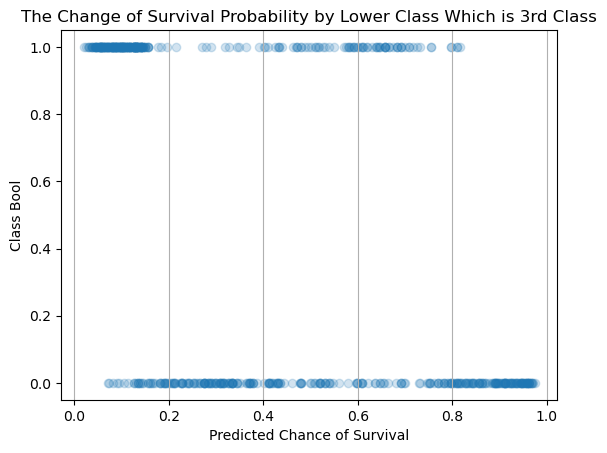

In [78]:
plt.scatter(x=res.predict(), y=x_train['C(Pclass)[T.3]'], alpha=0.2)
plt.grid(b=True, which='major', axis='x')
plt.xlabel("Predicted Chance of Survival")
plt.ylabel("Class Bool")
plt.title("The Change of Survival Probability by Lower Class Which is 3rd Class")

C:\Users\Saikat\AppData\Local\Temp\ipykernel_8620\391872850.py:2: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, linewidth=0.15)


Text(0.5, 1.0, 'The Change of Survival Probability by Lower Class Which is 3rd Class')

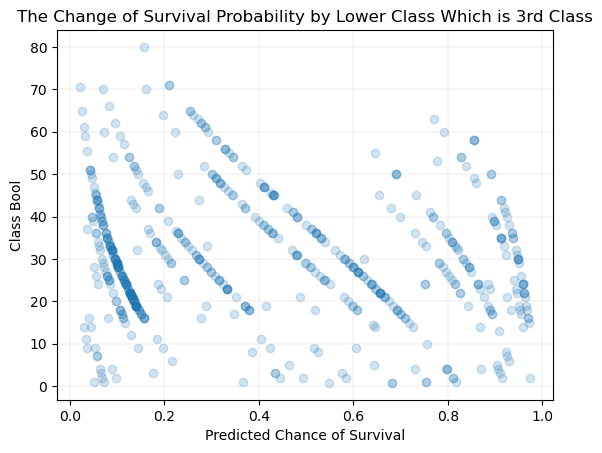

In [83]:
plt.scatter(x=res.predict(), y=x_train.Age, alpha=0.2)
plt.grid(b=True, linewidth=0.15)
plt.xlabel("Predicted Chance of Survival")
plt.ylabel("Class Bool")
plt.title("The Change of Survival Probability by Lower Class Which is 3rd Class")

C:\Users\Saikat\AppData\Local\Temp\ipykernel_8620\1923494299.py:2: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, linewidth=0.15)


Text(0.5, 1.0, 'The Change of Survival Probability by of Siblings / Spouses')

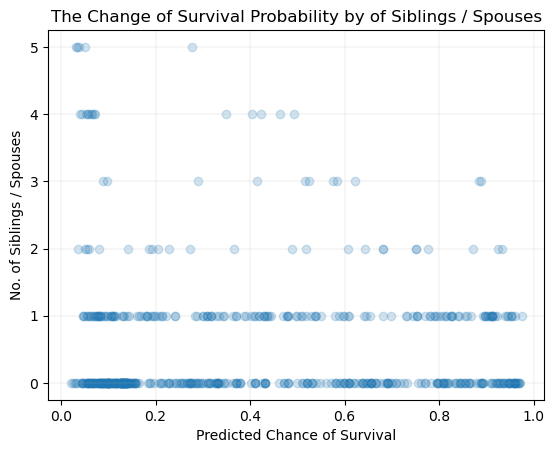

In [87]:
plt.scatter(x=res.predict(), y=x_train.SibSp, alpha=0.2)
plt.grid(b=True, linewidth=0.15)
plt.xlabel("Predicted Chance of Survival")
plt.ylabel("No. of Siblings / Spouses")
plt.title("The Change of Survival Probability by of Siblings / Spouses")

In [88]:
y_pred = res.predict(exog=x_test)
y_pred_flag = y_pred > 0.7
print(pd.crosstab(index=y_test.Survived,columns=y_pred_flag,rownames=['Actual'],colnames=['Predicted'],margins=True,margins_name="Total"))

Predicted  False  True  Total
Actual                       
0.0           67     0     67
1.0           21    24     45
Total         88    24    112


In [89]:
print(classification_report(y_true=y_test,y_pred=y_pred_flag))

              precision    recall  f1-score   support

         0.0       0.76      1.00      0.86        67
         1.0       1.00      0.53      0.70        45

    accuracy                           0.81       112
   macro avg       0.88      0.77      0.78       112
weighted avg       0.86      0.81      0.80       112



In [90]:
fpr,tpr,thresholds = roc_curve(y_true=y_test,y_score=y_pred)
roc_auc = auc(fpr,tpr)
print("Area under the ROC curve is : %f"% roc_auc)

Area under the ROC curve is : 0.879934


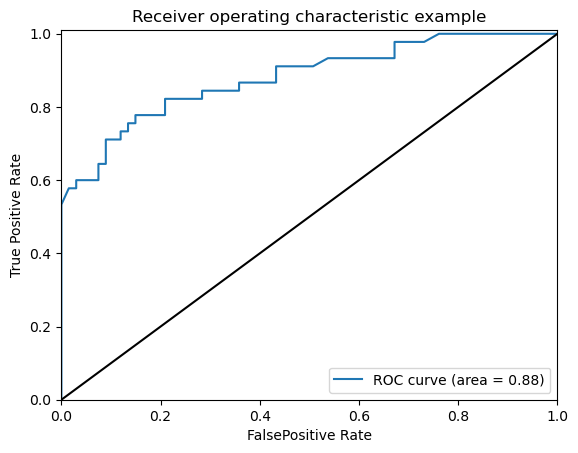

In [96]:
# Plot ROC curve
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k-') # k: black
plt.xlim ( [0.0, 1.0])
plt. ylim( [0.0, 1.01])
plt.xlabel('FalsePositive Rate')
plt.ylabel('True Positive Rate') 
plt.title('Receiver operating characteristic example')
plt.legend (loc="lower right")
plt.show()
